# Práctica 3: limpieza de datos

## Dataframe 2: Oscars-demographics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None #silence

### Exploración de datos

In [33]:
df = pd.read_csv('C:/Users/HP/Downloads/Oscars-demographics-DFE.csv' , encoding='latin-1')
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,award,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
0,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,Two Arabian Knights,Lewis Milestone,NaN,NaN,NaN,NaN
1,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,The Divine Lady,Frank Lloyd,NaN,NaN,NaN,NaN
2,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,All Quiet on the Western Front,Lewis Milestone,NaN,NaN,NaN,NaN
3,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,Best Director,http://www.nndb.com/people/544/000041421/,NaN,NaN,Skippy,Norman Taurog,NaN,NaN,NaN,NaN
4,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,Best Director,http://www.nndb.com/people/292/000044160/,NaN,NaN,Bad Girl,Frank Borzage,NaN,NaN,NaN,NaN


In [3]:
print(df.shape)
print(df.dtypes)

(441, 27)
_unit_id                           int64
_golden                             bool
_unit_state                       object
_trusted_judgments                 int64
_last_judgment_at                 object
birthplace                        object
birthplace:confidence            float64
date_of_birth                     object
date_of_birth:confidence         float64
race_ethnicity                    object
race_ethnicity:confidence        float64
religion                          object
religion:confidence              float64
sexual_orientation                object
sexual_orientation:confidence    float64
year_of_award                      int64
year_of_award:confidence         float64
award                             object
biourl                            object
birthplace_gold                   object
date_of_birth_gold                object
movie                             object
person                            object
race_ethnicity_gold               object
religi

Selección de columnas numéricas

In [17]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['_unit_id' '_trusted_judgments' 'birthplace:confidence'
 'date_of_birth:confidence' 'race_ethnicity:confidence'
 'religion:confidence' 'sexual_orientation:confidence' 'year_of_award'
 'year_of_award:confidence' 'year_of_award_gold']


Selección de columnas no numéricas

In [20]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['_golden' '_unit_state' '_last_judgment_at' 'birthplace' 'date_of_birth'
 'race_ethnicity' 'religion' 'sexual_orientation' 'award' 'biourl'
 'birthplace_gold' 'date_of_birth_gold' 'movie' 'person'
 'race_ethnicity_gold' 'religion_gold' 'sexual_orientation_gold'
 '_last_judgment_at_ismissing' 'birthplace_gold_ismissing'
 'date_of_birth_gold_ismissing' 'race_ethnicity_gold_ismissing'
 'religion_gold_ismissing' 'sexual_orientation_gold_ismissing'
 'year_of_award_gold_ismissing']


El dataset tiene 441 registros y 27 atributos, de los cuales 10 son numéricas y 24 son no numéricas

### Datos Faltantes 

#### Técnica #1: mapa de calor de los datos faltantes 

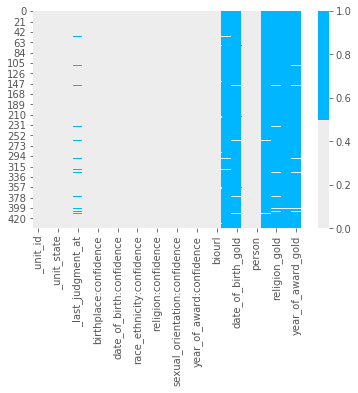

In [23]:
cols = df.columns[:27] 
colours = ['#EEEDED', '#00B6FF'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

Azul es no missing

#### Técnica #2: Lista de porcentaje de datos faltantes¶ 

In [7]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    if (pct_missing > 0):
        #print(pct_missing)
        print('{} - {}%'.format(col, round(pct_missing*100)))

_last_judgment_at - 6.0%
birthplace_gold - 98.0%
date_of_birth_gold - 98.0%
race_ethnicity_gold - 100.0%
religion_gold - 98.0%
sexual_orientation_gold - 99.0%
year_of_award_gold - 98.0%


La variable _last_judgment_at no es un gran problema pues solo le falta 6%, en cambio las otras 6 son un caso serio, pues les felta entre el 98% y el 100% de datos!

#### Técnica #3: Histograma de datos faltantes

created missing indicator for: _last_judgment_at
created missing indicator for: birthplace_gold
created missing indicator for: date_of_birth_gold
created missing indicator for: race_ethnicity_gold
created missing indicator for: religion_gold
created missing indicator for: sexual_orientation_gold
created missing indicator for: year_of_award_gold


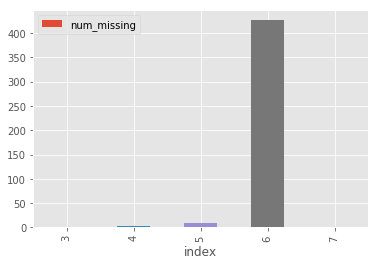

In [24]:
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        

ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

### ¿Qué hacer? 

#### Técnica #1: Histograma y Box Plot

Histograma de year_of_award_gold

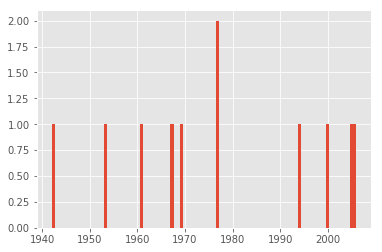

In [26]:
df['year_of_award_gold'].hist(bins=100)

entre los años 70's y 80's hay muchos más valores que en los demás, lo cual es raro, pues debería de haber la misma cantidad ya que se reparten la misma cantidad de premios por años

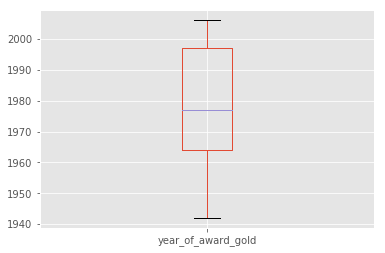

In [27]:
df.boxplot(column=['year_of_award_gold'])

en el boxplot no se ven datos atípicos, aunque se puede observar la media entre los 80's y 70's

#### Técnica #2: Estadística descriptiva

In [28]:
df['year_of_award_gold'].describe()

count      11.000000
mean     1977.363636
std        21.592928
min      1942.000000
25%      1964.000000
50%      1977.000000
75%      1997.000000
max      2006.000000
Name: year_of_award_gold, dtype: float64

la estadística descriptiva también indica que la variable year_of_award_gold están bien distribuidas y tiene valores entre 1942 y 2006

#### Técnica #3: Gráfico de barras

Esta técnica funciona para variables categóricas, por lo que usaremos la variable religion_gold

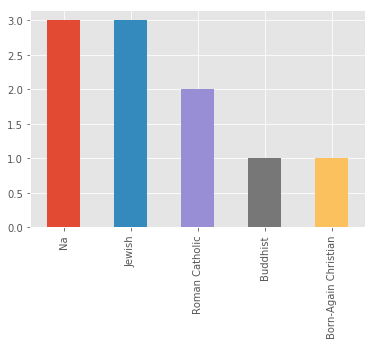

In [29]:
df['religion_gold'].value_counts().plot.bar()

 No se ven datos atípicos en religion_gold según la gráfica de barras, aunque hay muchos Na como lo vimos representaban el 98% del atributo 

El problema real con las variables con tantos missings de este DF es que no fueron llenados, porque al parecer el pequeño 2% que sí está registrado tiene distrubiciones buenas de datos a pesar de ser pocos, sin outliers como tal

### Datos innecesarios

¿Cómo descubrir datos innecesarios?

#### Tipo innecesario #1: Desinformativo / Repetitivo


Filas con con más del 95% de filas que tienen el mismo valor.

In [34]:
num_rows = len(df.index)
low_information_cols = [] 

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

birthplace:confidence: 98.18594%
1.0000    433
0.6667      5
0.9593      1
0.6571      1
0.9595      1
Name: birthplace:confidence, dtype: int64

date_of_birth:confidence: 98.18594%
1.0000    433
0.6667      3
0.9596      1
0.9597      1
0.9648      1
0.9631      1
0.6562      1
Name: date_of_birth:confidence, dtype: int64

race_ethnicity:confidence: 99.54649%
1.0000    439
0.6571      1
0.9594      1
Name: race_ethnicity:confidence, dtype: int64

religion:confidence: 96.59864%
1.0000    426
0.6897      5
0.6667      3
0.3333      2
0.9630      1
0.9597      1
0.6571      1
0.6562      1
0.9624      1
Name: religion:confidence, dtype: int64

sexual_orientation:confidence: 97.50567%
1.0000    430
0.6667      6
0.6571      2
0.6857      1
0.6842      1
0.9599      1
Name: sexual_orientation:confidence, dtype: int64

year_of_award:confidence: 96.37188%
1.0000    425
0.6667      6
0.6897      2
0.6923      1
0.9643      1
0.9195      1
0.3333      1
0.7227      1
0.6857      1
0.9642      

No hay columnas repetitivas

#### Tipo innecesario #2: Irrelevante

Tomaremos como irrelevantes los datos con más de 98% en missings porque no nos aportan información

In [44]:
l = ['date_of_birth_gold', 'race_ethnicity_gold', 'religion_gold', 'sexual_orientation_gold', 'year_of_award_gold']

In [45]:
for i in range(len(l)):
    df = df.drop(l[i], axis=1)

In [48]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,religion,religion:confidence,sexual_orientation,sexual_orientation:confidence,year_of_award,year_of_award:confidence,award,biourl,movie,person
0,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Na,1.0,Straight,1.0000,1927,1.0000,Best Director,http://www.nndb.com/people/320/000043191/,Two Arabian Knights,Lewis Milestone
1,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,Na,1.0,Straight,0.6842,1930,1.0000,Best Director,http://www.nndb.com/people/626/000042500/,The Divine Lady,Frank Lloyd
2,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Na,1.0,Straight,1.0000,1931,0.6667,Best Director,http://www.nndb.com/people/320/000043191/,All Quiet on the Western Front,Lewis Milestone
3,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,Na,1.0,Straight,1.0000,1932,1.0000,Best Director,http://www.nndb.com/people/544/000041421/,Skippy,Norman Taurog
4,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,Roman Catholic,1.0,Straight,1.0000,1933,1.0000,Best Director,http://www.nndb.com/people/292/000044160/,Bad Girl,Frank Borzage


#### Tipo innecesario #3: Duplicados

######                       Duplicados tipo #1: todas las características

In [49]:
df_dedupped = df.drop('_unit_id', axis=1).drop_duplicates()


print(df.shape)
print(df_dedupped.shape)

(441, 21)
(441, 20)


#### Duplicados tipo #2: características claves

Tomamos las primeras 5 características de los registros como clave

In [51]:
key = ['_golden', '_unit_state', '_last_judgment_at', 'birthplace', 'date_of_birth', 'race_ethnicity']

df.fillna(-999).groupby(key)['_unit_id'].count().sort_values(ascending=False).head(20)

_golden  _unit_state  _last_judgment_at  birthplace                       date_of_birth  race_ethnicity
True     golden       -999               Lincoln, Ne                      30-Jul-74      White             2
False    finalized    2/10/15 2:05       New York City                    21-Dec-37      White             2
                      2/10/15 2:04       Burbank, Ca                      17-Aug-60      White             2
True     golden       -999               Woodlawn, Md                     11-Dec-67      Black             1
False    finalized    2/10/15 2:01       London, England                  16-Feb-26      White             1
                                         Nevada, Mo                       5-Aug-06       White             1
                                         New York City                    2-Nov-13       White             1
                                                                          21-Jun-21      White             1
                        

In [52]:
df_dedupped2 = df.drop_duplicates(subset=key)

print(df.shape)
print(df_dedupped2.shape)

(441, 21)
(438, 21)


No hubo ninguna columna duplicada por características clave

### Datos inconsistentes

#### Tipo inconsistente #1: Capitalización

In [54]:
df['birthplace'].value_counts(dropna=False)

New York City                              35
London, England                            24
Los Angeles, Ca                            16
Chicago, Il                                13
Brooklyn, Ny                                9
Hartford, Ct                                5
Paris, France                               5
Philadelphia, Pa                            5
Tokyo, Japan                                4
La Jolla, Ca                                4
Kansas City, Mo                             4
Cape Elizabeth, Me                          4
Lincoln, Ne                                 4
Vienna, Austria                             4
Swampscott, Ma                              3
Lowell, Ma                                  3
Mulhouse, Haut-Rhin, Alsace, France         3
Croydon, Surrey, England                    3
Sucha, Galicia, Austria                     3
Bronx, Ny                                   3
St. Louis, Mo                               3
Washington, Dc                    

In [55]:
df['birthplace_upper'] = df['birthplace'].str.upper()
df['birthplace_upper'].value_counts(dropna=False)

NEW YORK CITY                                 35
LONDON, ENGLAND                               24
LOS ANGELES, CA                               16
CHICAGO, IL                                   13
BROOKLYN, NY                                   9
PARIS, FRANCE                                  5
HARTFORD, CT                                   5
PHILADELPHIA, PA                               5
VIENNA, AUSTRIA                                4
TOKYO, JAPAN                                   4
LINCOLN, NE                                    4
CAPE ELIZABETH, ME                             4
KANSAS CITY, MO                                4
LA JOLLA, CA                                   4
CONCORD, CA                                    3
LOWELL, MA                                     3
BRONX, NY                                      3
ST. LOUIS, MO                                  3
MULHOUSE, HAUT-RHIN, ALSACE, FRANCE            3
SUCHA, GALICIA, AUSTRIA                        3
STOCKHOLM, SWEDEN   

#### Tipo inconsistente #2: Formatos

In [60]:
df._last_judgment_at.value_counts()

2/10/15 2:04    28
2/10/15 2:05    28
2/10/15 1:59    24
2/10/15 2:03    20
2/10/15 1:51    20
2/10/15 2:00    16
2/10/15 3:50    12
2/10/15 2:07    12
2/10/15 1:55    12
2/10/15 2:02    12
2/10/15 2:18    12
2/10/15 1:46     8
2/10/15 2:10     8
2/10/15 4:02     8
2/10/15 4:07     8
2/10/15 2:12     8
2/10/15 2:15     8
2/10/15 2:06     8
2/10/15 1:53     8
2/10/15 2:11     8
2/10/15 2:08     8
2/10/15 2:14     8
2/10/15 1:49     8
2/10/15 1:52     8
2/10/15 4:08     8
2/10/15 1:57     8
2/10/15 1:56     8
2/10/15 2:01     8
2/10/15 3:55     4
2/10/15 3:51     4
2/10/15 2:13     4
2/10/15 3:45     4
2/10/15 2:41     4
2/10/15 3:57     4
2/10/15 3:56     4
2/10/15 4:21     4
2/10/15 1:48     4
2/10/15 1:47     4
2/10/15 2:09     4
2/10/15 4:14     4
2/10/15 3:48     4
2/10/15 2:29     4
2/10/15 4:06     4
2/10/15 1:58     4
2/10/15 3:58     4
2/10/15 2:16     4
2/10/15 1:43     4
2/10/15 3:53     4
2/10/15 2:19     4
Name: _last_judgment_at, dtype: int64

In [61]:
df._last_judgment_at.describe()

count              416
unique              49
top       2/10/15 2:04
freq                28
Name: _last_judgment_at, dtype: object

In [78]:
df['_last_judgment_at_dt'] = pd.to_datetime(df['_last_judgment_at'])
df['year'] = df['_last_judgment_at_dt'].dt.year
df['month'] = df['_last_judgment_at_dt'].dt.month
df['weekday'] = df['_last_judgment_at_dt'].dt.weekday

print(df['year'].value_counts(dropna=False))
print()
print(df['month'].value_counts(dropna=False))

 2015.0    416
NaN         25
Name: year, dtype: int64

 2.0    416
NaN      25
Name: month, dtype: int64


#### Tipo inconsistente #3: Valores categóricos

#### Tipo inconsistente #4: Direcciones

In [82]:
df['birthplace_std'] = df['birthplace'].str.lower()
df['birthplace_std'] = df['birthplace_std'].str.strip() # remove leading and trailing whitespace.
df['birthplace_std'] = df['birthplace_std'].str.replace('\\.', '') # remove period.
df['birthplace_std'] = df['birthplace_std'].str.replace('\\bstreet\\b', 'st') # replace street with st.
df['birthplace_std'] = df['birthplace_std'].str.replace('\\bapartment\\b', 'apt') # replace apartment with apt.
df['birthplace_std'] = df['birthplace_std'].str.replace('\\bav\\b', 'ave') # replace apartment with apt.
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,award,biourl,movie,person,birthplace_upper,_last_judgment_at_dt,year,month,weekday,birthplace_std
0,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,Two Arabian Knights,Lewis Milestone,"CHISINAU, MOLDOVA",2015-02-10 03:45:00,2015.0,2.0,1.0,"chisinau, moldova"
1,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,Best Director,http://www.nndb.com/people/626/000042500/,The Divine Lady,Frank Lloyd,"GLASGOW, SCOTLAND",2015-02-10 02:03:00,2015.0,2.0,1.0,"glasgow, scotland"
2,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,All Quiet on the Western Front,Lewis Milestone,"CHISINAU, MOLDOVA",2015-02-10 02:05:00,2015.0,2.0,1.0,"chisinau, moldova"
3,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,Best Director,http://www.nndb.com/people/544/000041421/,Skippy,Norman Taurog,"CHICAGO, IL",2015-02-10 02:04:00,2015.0,2.0,1.0,"chicago, il"
4,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,Best Director,http://www.nndb.com/people/292/000044160/,Bad Girl,Frank Borzage,"SALT LAKE CITY, UT",2015-02-10 01:48:00,2015.0,2.0,1.0,"salt lake city, ut"
